# building graph 
# nodes are:
# - gene consensus DE-upregulated (blue),
# - target gene of drugs (green),
# - drugs nodes (yellow),


1) open PPI dataset

2) plot distribution of scores

3) choose score and tresholding: new PPI

4) open consensus DE up genes

5) open dataset drug - gene target and choose the maximum importance of gene target to be considered:

    build list of drugs and gene targets

6) Show proteins present in union between consensus and target genes but not present in the new PPI 

7) find protein near my gene target list one step away

8) modify new PPI taking only union genes: new PPI 2

    remember that some genes of our interest will be cut off because of the PPI cut

9) build dataset new PPI 2 and drug protein interaction

#Note that the actual PPI graph has been plotted in the paper with GEPHI (https://gephi.org/). Below, last section, there is a random example for the graph plotting.

In [1]:
import os
import pandas as pd
import random
import numpy as np

In [2]:
path_data = os.getcwd()+os.sep+'data'+os.sep
ppi_names_full_score = pd.read_csv(path_data+'ppi_names_full_score.csv', index_col=0)
print('lenght rows:', len(ppi_names_full_score))
ppi_names_full_score.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


lenght rows: 11938498


,protein1,protein2,neighborhood,fusion,cooccurence,coexpression,experimental,database,combined_score
0,ARF5,PDE1C,0,0,0,54,0,0,155
1,ARF5,PAK2,0,0,0,0,180,0,197
2,ARF5,RAB36,0,0,0,62,152,0,222
3,ARF5,RAPGEF1,0,0,0,0,161,0,181
4,ARF5,SUMO3,0,0,0,82,213,0,270


neighborhood
AxesSubplot(0.125,0.125;0.775x0.755)


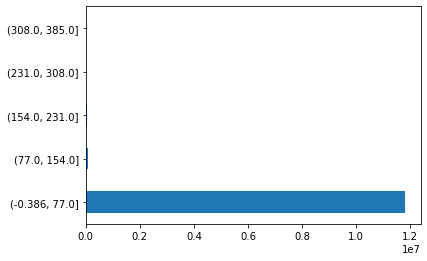


fusion
AxesSubplot(0.125,0.125;0.775x0.755)


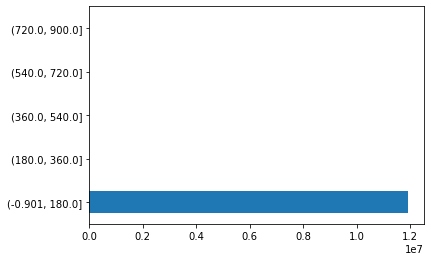


cooccurence
AxesSubplot(0.125,0.125;0.775x0.755)


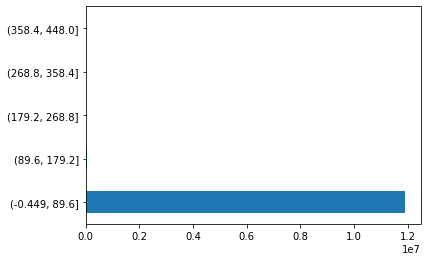


coexpression
AxesSubplot(0.125,0.125;0.775x0.755)


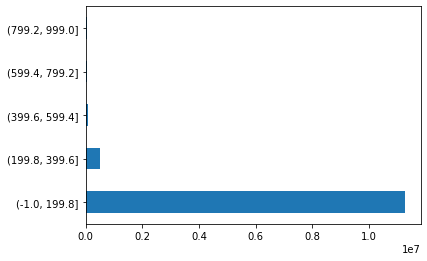


experimental
AxesSubplot(0.125,0.125;0.775x0.755)


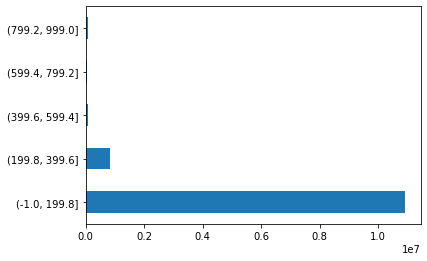


database
AxesSubplot(0.125,0.125;0.775x0.755)


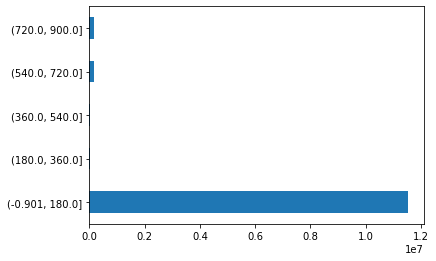


combined_score
AxesSubplot(0.125,0.125;0.775x0.755)


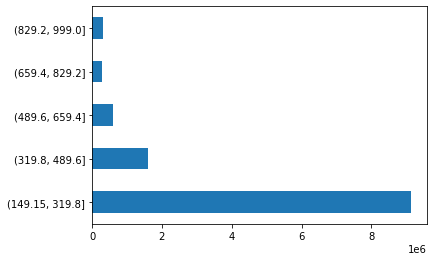

In [3]:
import matplotlib.pyplot as plt
score_list = ['neighborhood', 'fusion', 'cooccurence', 'coexpression', 'experimental', 'database', 'combined_score']
for s in score_list:
    print(s)
    plt.figure()
    print(ppi_names_full_score[s].value_counts(bins=5,sort=False).plot(kind='barh'))
    plt.show()
    print()

In [4]:
import matplotlib.pyplot as plt
score_list = ['neighborhood', 'fusion', 'cooccurence', 'coexpression', 'experimental', 'database', 'combined_score']
for s in score_list:
    print(s)
    print(ppi_names_full_score[s].value_counts(bins=5,sort=False))
    print()

neighborhood
(-0.386, 77.0]    11785162
(77.0, 154.0]        75908
(154.0, 231.0]       64322
(231.0, 308.0]       11038
(308.0, 385.0]        2068
Name: neighborhood, dtype: int64

fusion
(-0.901, 180.0]    11934374
(180.0, 360.0]         2522
(360.0, 540.0]          886
(540.0, 720.0]          624
(720.0, 900.0]           92
Name: fusion, dtype: int64

cooccurence
(-0.449, 89.6]    11883052
(89.6, 179.2]        33974
(179.2, 268.8]       14656
(268.8, 358.4]        4596
(358.4, 448.0]        2220
Name: cooccurence, dtype: int64

coexpression
(-1.0, 199.8]     11266846
(199.8, 399.6]      513378
(399.6, 599.4]       80422
(599.4, 799.2]       40520
(799.2, 999.0]       37332
Name: coexpression, dtype: int64

experimental
(-1.0, 199.8]     10897520
(199.8, 399.6]      834414
(399.6, 599.4]       75110
(599.4, 799.2]       58700
(799.2, 999.0]       72754
Name: experimental, dtype: int64

database
(-0.901, 180.0]    11537060
(180.0, 360.0]        14102
(360.0, 540.0]        35290
(540.0

In [5]:
list_full_protein = list(
    set(
        list(set(ppi_names_full_score['protein1']))+
        list(set(ppi_names_full_score['protein2']))
    )
)
print('lenght full proteins:',len(list_full_protein))

lenght full proteins: 19382


## choose score and tresholding

In [6]:
#'neighborhood', 'fusion', 'cooccurence', 'coexpression', 'experimental', 'database', 'combined_score'

score_name = 'combined_score'
treshold = 500

df_names_score = ppi_names_full_score[['protein1', 'protein2', score_name]]

df_names_score = df_names_score[df_names_score[score_name]>treshold]
print('numer rows',len(df_names_score))
df_names_score.head()

numer rows 1146044


,protein1,protein2,combined_score
5,ARF5,ACAP2,767
36,ARF5,CD59,600
92,ARF5,PARP1,543
96,ARF5,RAB1A,730
122,ARF5,INS,605


In [7]:
import numpy as np
percent = np.round((len(ppi_names_full_score[ppi_names_full_score[score_name]>treshold])*100)/len(ppi_names_full_score[score_name]),2)
print('Treshold',score_name,'>',treshold,'rapresent the',percent,'% of the ppi full dataset:')
print(len(ppi_names_full_score[ppi_names_full_score[score_name]>treshold]),'/',len(ppi_names_full_score[score_name]))

Treshold combined_score > 500 rapresent the 9.6 % of the ppi full dataset:
1146044 / 11938498


In [8]:
# Treshold coexpression > 500 rapresent the 0.96 % of the ppi full dataset:
# 114778 / 11938498

In [9]:
curr_list_protein = list(
    set(
        list(set(df_names_score['protein1']))+
        list(set(df_names_score['protein2']))
    )
)
print('lenght proteins:',len(curr_list_protein))

lenght proteins: 19168


# open gene of the consensus signature

In [10]:
import pickle

gene_cons_file = 'up_dw_genes_OA_combinedSig.xlsx'
gene_cons = pd.read_excel(path_data+gene_cons_file)

#print(gene_cons.head())
gene_cons_inters_list = list(set(gene_cons['gene']))
print(gene_cons_inters_list)
print('\nlenght gene d.e. :',len(gene_cons_inters_list))

['GALNT16', 'CRLF1', 'THY1', 'COL1A1', 'COL3A1', 'CRABP2', 'GAS1', 'DNER', 'HTRA1', 'CXCL14', 'TSPAN2', 'TGFBI', 'OGN', 'TPPP3', 'ASPN', 'SYT8', 'DYSF', 'MAMDC2', 'TREM1', 'S100A4', 'SLC2A12', 'R3HDML', 'TNFSF11', 'GFRA2', 'SMOC1', 'SOX11', 'KCNN4', 'TNNI2', 'TMEM59L', 'ADAMTS2', 'AQP1', 'THBS3', 'SEMA3D', 'ADAMTS6', 'LOXL3', 'TNC', 'COL15A1', 'ACKR2', 'TNNT3']

lenght gene d.e. : 39


# open dataset drug - gene target

In [11]:
import pandas as pd

file_name = 'gene2drug_OA_UPandDN-TTD.xlsx'
df_drugs_gene = pd.read_excel(path_data+file_name)
df_drugs_gene = df_drugs_gene[['Drug','Targets']]
df_drugs_gene = df_drugs_gene.dropna()
print('df_drugs_gene columns :',df_drugs_gene.columns)
print('rows number :',len(df_drugs_gene))
df_drugs_gene.head()

df_drugs_gene columns : Index(['Drug', 'Targets'], dtype='object')
rows number : 566


,Drug,Targets
2,letrozole,CYP19A1
3,pirinixic_acid,PPARA
5,ribavirin,IMPDH1
6,levobunolol,ADRB1
7,cycloserine,"MycB ddl, GRIN1, MycB alr"


# choose the maximum importance of gene target to be considered

In [12]:
max_importance = 50


df_drug_target_importance = []
for index in df_drugs_gene.index:
    if index > max_importance:
        break
    drug = df_drugs_gene[df_drugs_gene.index == index].values[0][0]
    drug_sort = str(index)+'_'+drug
    targets = df_drugs_gene[df_drugs_gene.index == index].values[0][1].replace(', ',' ').replace('; ',' ').split()
    for target in targets:
        df_drug_target_importance.append([drug_sort,target,1])
    
df_drug_target_importance = pd.DataFrame(df_drug_target_importance, columns = ['drug', 'target','score'])
print('lenght:', len(df_drug_target_importance))
df_drug_target_importance.head()

lenght: 36


,drug,target,score
0,2_letrozole,CYP19A1,1
1,3_pirinixic_acid,PPARA,1
2,5_ribavirin,IMPDH1,1
3,6_levobunolol,ADRB1,1
4,7_cycloserine,MycB,1


In [13]:
gene_target_importance = list(set(df_drug_target_importance['target'].values))
print('lenght gene target list:', len(gene_target_importance))

lenght gene target list: 32


In [14]:
#################################################################

In [15]:
print('\nLenght gene d.e. :',len(gene_cons_inters_list))

print('Lenght gene target list:', len(gene_target_importance))

set_gene_full = list(set(gene_cons_inters_list+gene_target_importance))

print('Lenght union gene d.e. and gene target :',len(set_gene_full))

print('\nFinding proteing in union and not in ppi proteins..')

set_gene_full_copy = []
k = 0
for name in set_gene_full:
    if name not in curr_list_protein:
        print(name,'absent')
        k+=1
    else:
        set_gene_full_copy.append(name)

print('\nNumber of absent proteins:',k)

set_gene_full = set_gene_full_copy

gene_cons_inters_list = [gene for gene in gene_cons_inters_list if gene in set_gene_full]
print('New gene d.e. lenght:',len(gene_cons_inters_list))

gene_target_importance = [gene for gene in gene_target_importance if gene in set_gene_full]
print('New gene target lenght:',len(gene_target_importance))


Lenght gene d.e. : 39
Lenght gene target list: 32
Lenght union gene d.e. and gene target : 71

Finding proteing in union and not in ppi proteins..
alr absent
MycB absent
Bact absent
mrcA absent
Stap-coc absent
DHOdehase absent
ddl absent
Malaria absent
CALM absent
pbp2 absent

Number of absent proteins: 10
New gene d.e. lenght: 39
New gene target lenght: 22


## modify dataframe interaction taking only union genes

In [16]:
bool_p1 = list(map(lambda x: (x in set_gene_full) , df_names_score['protein1']))
df_names_score_cropped = df_names_score[bool_p1]

In [17]:
bool_p2 = list(map(lambda x: (x in set_gene_full) , df_names_score_cropped['protein2']))
df_names_score_cropped = df_names_score_cropped[bool_p2]

In [18]:
print('len:',len(df_names_score_cropped))
df_names_score_cropped.head()

len: 82


,protein1,protein2,combined_score
206016,SIRT1,PPARA,994
207676,SIRT1,GAS1,601
208041,SIRT1,PTGS2,520
581610,COL1A1,HTRA1,613
581909,COL1A1,ADAMTS2,970


In [19]:
curr_protein_list_2 = list(
    list(set(df_names_score_cropped['protein1']))+
    list(set(df_names_score_cropped['protein2']))
)
print('Current ppi protein lenght:', len(curr_protein_list_2))

gene_cons_inters_list = [gene for gene in gene_cons_inters_list if gene in curr_protein_list_2]
print('New gene d.e. lenght:',len(gene_cons_inters_list))

gene_target_importance = [gene for gene in gene_target_importance if gene in curr_protein_list_2]
print('New gene target lenght:',len(gene_target_importance))

Current ppi protein lenght: 70
New gene d.e. lenght: 20
New gene target lenght: 15


# build dataset ppi + drug protein interaction

In [20]:
df_drug_target_importance[df_drug_target_importance['target'].isin(gene_target_importance)]

,drug,target,score
0,2_letrozole,CYP19A1,1
1,3_pirinixic_acid,PPARA,1
6,7_cycloserine,GRIN1,1
13,18_benzbromarone,ANO1,1
16,23_naphazoline,DRD2,1
18,25_primidone,GABRA1,1
19,26_cinoxacin,TOP2A,1
20,26_cinoxacin,TOP2B,1
21,28_resveratrol,PTGS1,1
22,28_resveratrol,SIRT1,1


In [21]:
df_drug_target_importance_new = df_drug_target_importance.copy()
df_drug_target_importance_new = df_drug_target_importance_new[df_drug_target_importance_new['target'].isin(gene_target_importance)]
df_drug_target_importance_new.columns = ['protein1', 'protein2', score_name]
df_drug_target_importance_new.columns

Index(['protein1', 'protein2', 'combined_score'], dtype='object')

In [22]:
concat = [df_names_score_cropped, df_drug_target_importance_new]

multiRelational = pd.concat(concat)

# plotting graph

In [23]:
list_of_gene = gene_cons_inters_list+gene_target_importance

In [24]:
import networkx as nx
import numpy as np

G_new=nx.Graph(name='Multi-relational Graph')
interactions = multiRelational.values
for a,b,w in interactions:
    w = float(w) # score as weighted edge where high scores = low weight
    G_new.add_weighted_edges_from([(a,b,w)]) # add weighted edge to graph

In [25]:
print('number of nodes:',len(G_new.nodes()))
print('number of edges:',len(G_new.edges()))

number of nodes: 47
number of edges: 58


In [26]:
labels= {}
for node in G_new.nodes():
    labels[node]=node

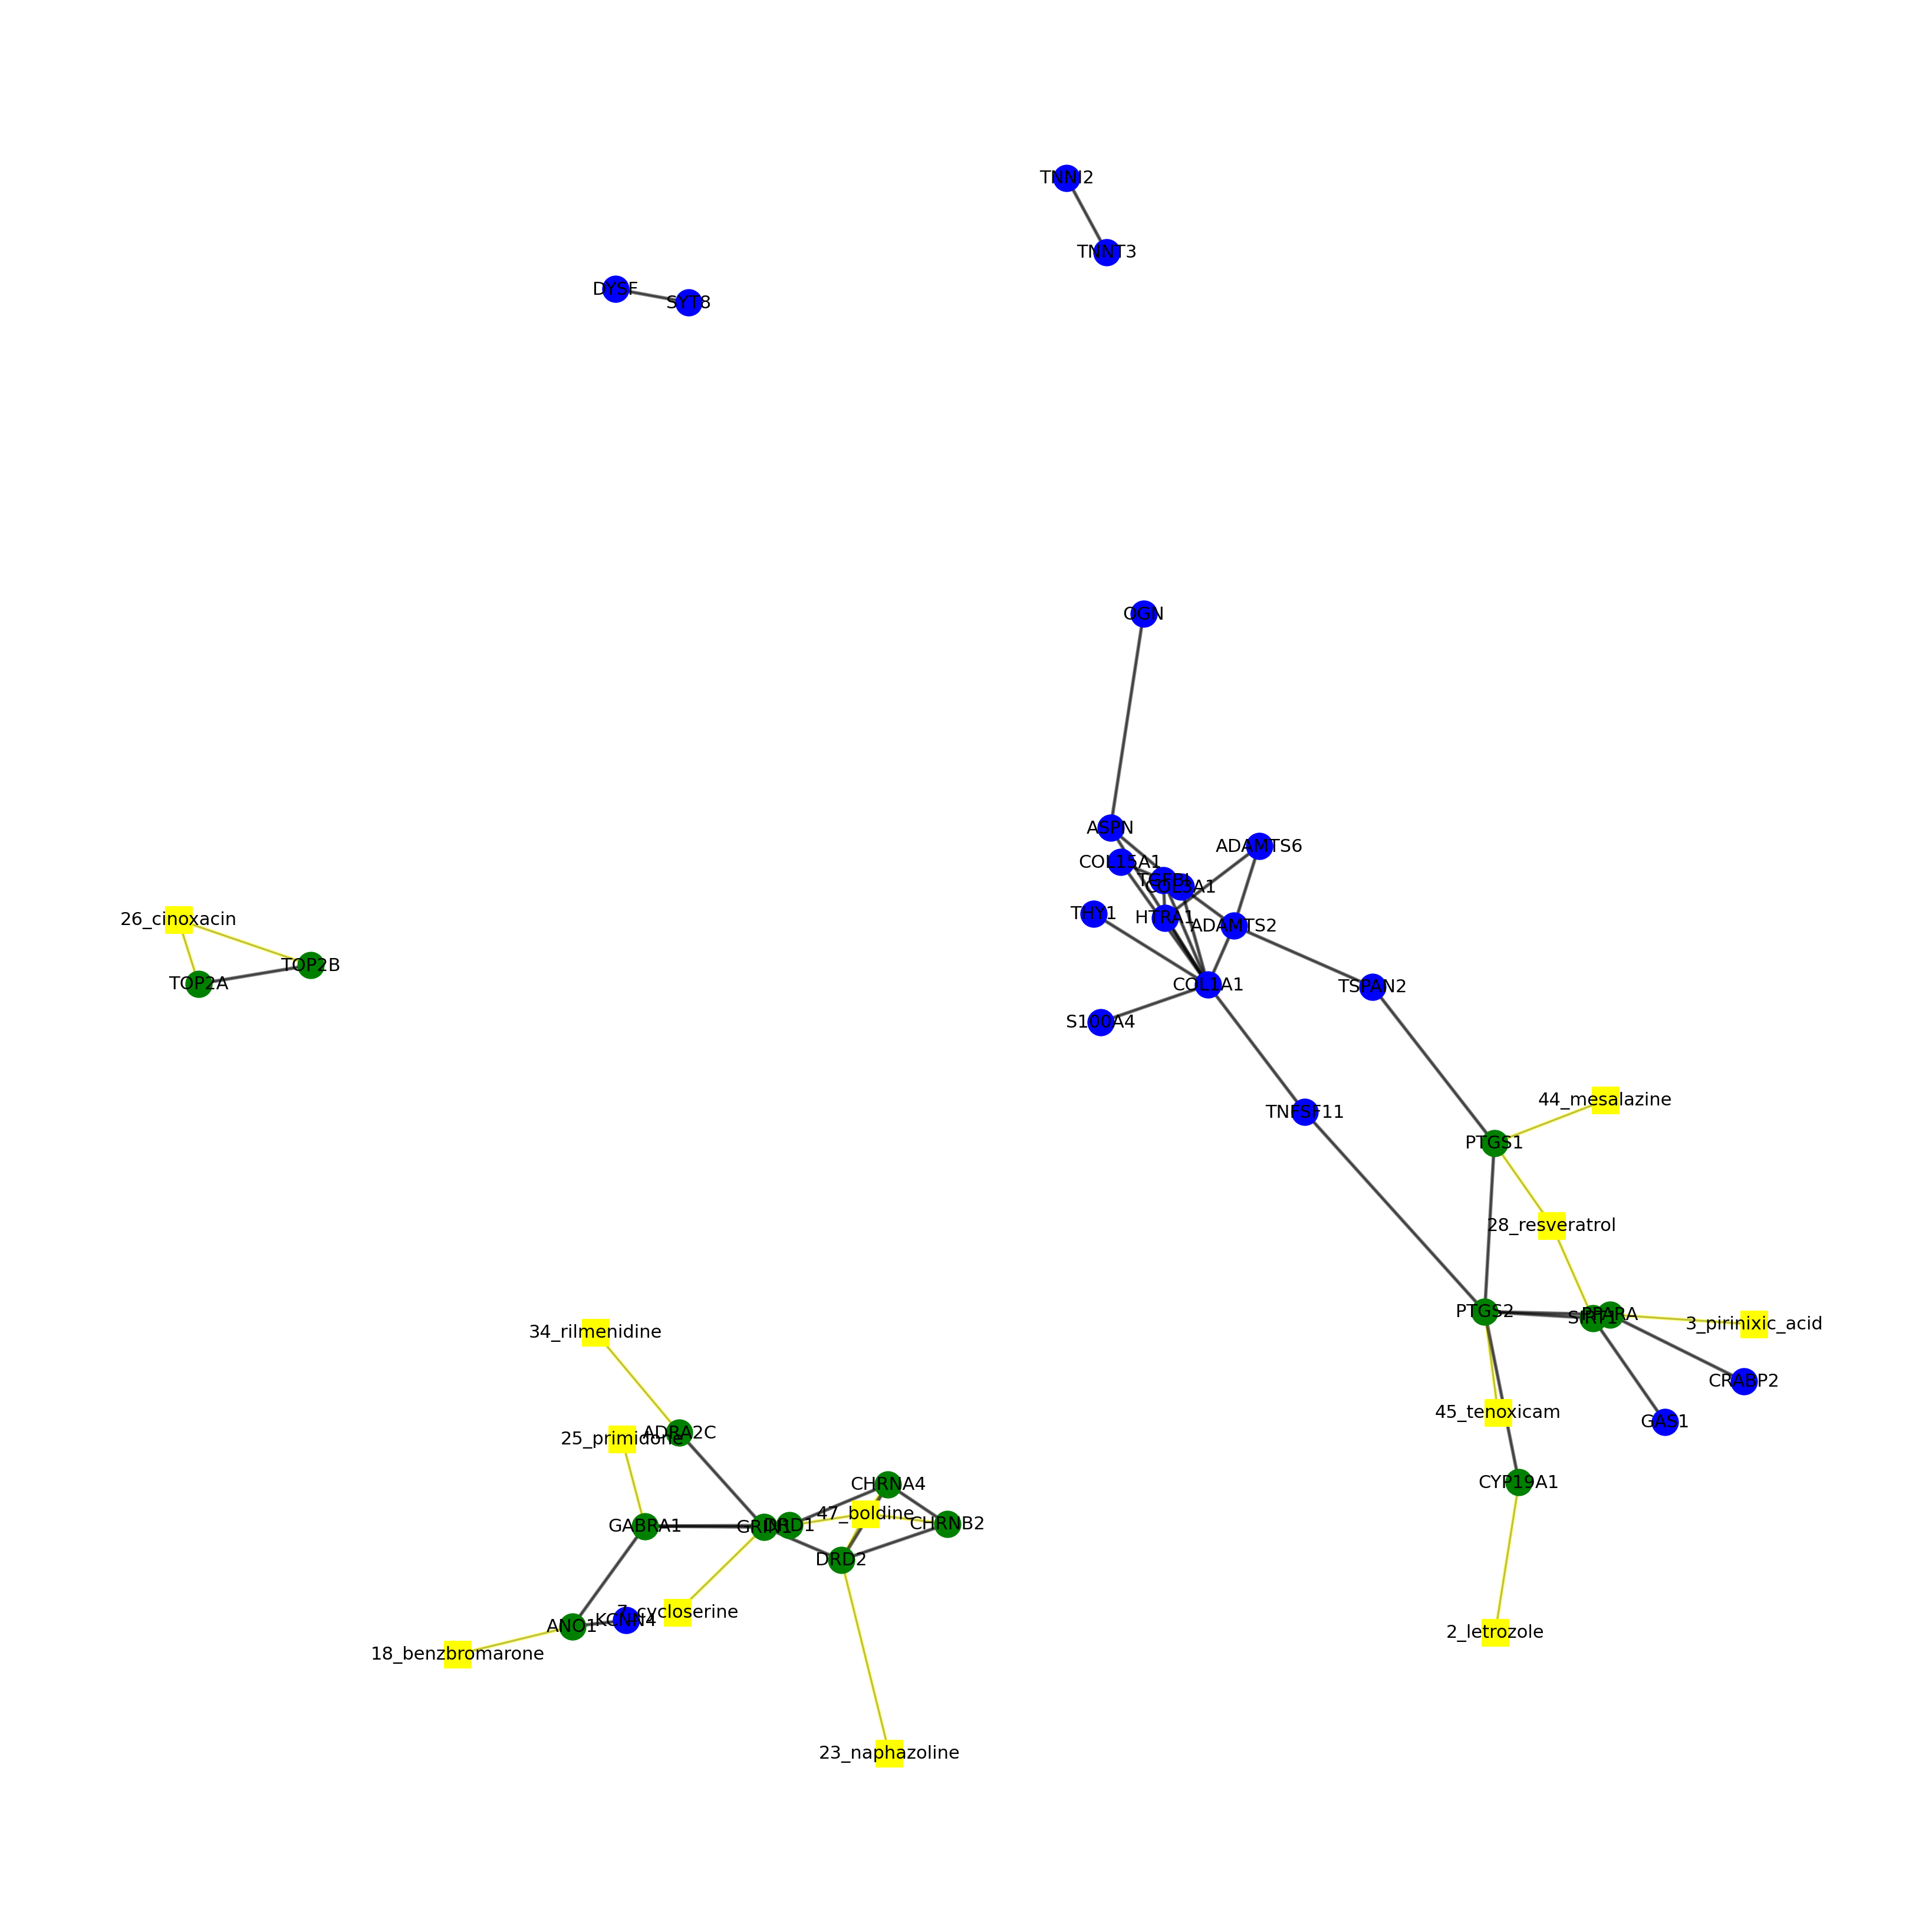

In [28]:

import random

random.seed(42)

plt.figure(num=None, figsize=(15, 15), dpi=220)

G = nx.Graph()

# Aggiungiamo i nodi alle liste A, B, C
A = df_drug_target_importance_new['protein1'].unique()
B = gene_cons_inters_list
C = gene_target_importance

# Aggiungiamo i nodi al grafo
G.add_nodes_from(A, color='yellow')
G.add_nodes_from(B, color='blue')
G.add_nodes_from(C, color='green')

for nod1,nod2,sc in multiRelational.values:
    G.add_edge(nod1,nod2)
    
# Definiamo i layout e la posizione dei nodi
#pos = nx.spring_layout(G, k=0.2, iterations=50)
pos = nx.spring_layout(G, k=0.2, iterations=50, seed=10)# + np.random.rand(len(G), 2) * 0.1
for k,v in pos.items():
    pos[k] = v + (np.random.rand(len(G), 2) *0.1)[0]

# Disegniamo i nodi e gli archi
nx.draw_networkx_nodes(G, pos, nodelist=A, node_size=200, node_color='yellow', node_shape='s')
nx.draw_networkx_nodes(G, pos, nodelist=B, node_size=200, node_color='blue')
nx.draw_networkx_nodes(G, pos, nodelist=C, node_size=200, node_color='green')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Definiamo i colori dei bordi dei nodi
node_color_map = {'yellow': 'yellow', 'blue': 'b', 'green': 'g'}
node_colors = [node_color_map[G.nodes[node]['color']] for node in G.nodes()]

# Aggiungiamo i label ai nodi
node_labels = {}
for node in G.nodes():
    node_labels[node] = node

# Disegniamo i label dei nodi
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

# Definiamo i colori dei bordi degli archi
edge_color_map = {'yellow': 'yellow', 'blue': 'black', 'green': 'black'}
edge_colors = [edge_color_map[G.nodes[edge[0]]['color']] for edge in G.edges()]

# Disegniamo i bordi dei nodi e degli archi
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2.0, alpha=0.5)

# Nascondiamo gli assi del plot
plt.axis('off')

# Mostrare il grafico
#plt.show()
plt.tight_layout()

path_img = os.getcwd()+os.sep+'images_output'+os.sep
name = "graph_gde_and_target_"+score_name+'_'+str(treshold)+'_'+'drugs_importance'+str(max_importance)+".pdf"
file_name = path_img+name
#plt.savefig(file_name,bbox_inches="tight")